In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

In [4]:
df.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,17,1,23.18,27.2720,1.0,721.25,0.004793,1
1,1,17,1,23.15,27.2675,1.0,714.00,0.004783,1
2,1,17,1,23.15,27.2450,1.0,713.50,0.004779,1
3,1,17,1,23.15,27.2000,1.0,708.25,0.004772,1
4,1,17,1,23.10,27.2000,1.0,704.50,0.004757,1


In [5]:
test.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,14,1,21.7600,31.133333,1.0,1029.666667,0.005021,1
1,1,14,1,21.7900,31.000000,1.0,1000.000000,0.005009,1
2,1,14,1,21.7675,31.122500,1.0,1003.750000,0.005022,1
3,1,14,1,21.7675,31.122500,1.0,1009.500000,0.005022,1
4,1,14,1,21.7900,31.133333,1.0,1005.666667,0.005030,1


In [6]:
#preparing the two datasets splitting the attributes with the class 
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes].values
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes].values
y_test = test['Occupancy']

In [7]:
#trying the K-NN algorithm with K=5
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.47323625922887613
F1-score [0.56469791 0.33311697]
              precision    recall  f1-score   support

           0       0.81      0.43      0.56      7703
           1       0.23      0.63      0.33      2049

    accuracy                           0.47      9752
   macro avg       0.52      0.53      0.45      9752
weighted avg       0.69      0.47      0.52      9752



In [8]:
#trying the K-NN algorithm with K=1
from sklearn.metrics import confusion_matrix
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_train, y_train)

y_predB = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_predB))
print('F1-score %s' % f1_score(y_test, y_predB, average=None))
print(classification_report(y_test, y_predB))
print(confusion_matrix(y_test, y_predB))

Accuracy 0.4749794913863823
F1-score [0.56425532 0.33969564]
              precision    recall  f1-score   support

           0       0.82      0.43      0.56      7703
           1       0.23      0.64      0.34      2049

    accuracy                           0.47      9752
   macro avg       0.52      0.54      0.45      9752
weighted avg       0.70      0.47      0.52      9752

[[3315 4388]
 [ 732 1317]]


In [17]:
#trying the K-NN algorithm with K=78
clf = KNeighborsClassifier(n_neighbors=78, weights='uniform')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.6808859721082855
F1-score [0.76896808 0.48425588]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      7703
           1       0.37      0.71      0.48      2049

    accuracy                           0.68      9752
   macro avg       0.63      0.69      0.63      9752
weighted avg       0.79      0.68      0.71      9752

[[5179 2524]
 [ 588 1461]]


In [10]:
# Calculating error for K values between 1 and 170
#error = []
#for i in range(1, 170):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train, y_train)
#    pred_i = knn.predict(X_test)
#    error.append(np.mean(pred_i != y_test))
    #print(i, np.mean(pred_i != y_test))

In [11]:
# Plotting the error for see the best value of K that we can have. As we can from the graph is between 75 and 80.
#plt.figure(figsize=(20, 6))
#plt.plot(range(1, 170), error, color='green', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
#plt.title('Error Rate K Value')
#plt.xlabel('K Value')
#plt.ylabel('Mean Error')

In [12]:
#np.amin(error)

In [13]:
#Print the roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predB)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_predB, average=None)

0.5365521866041049


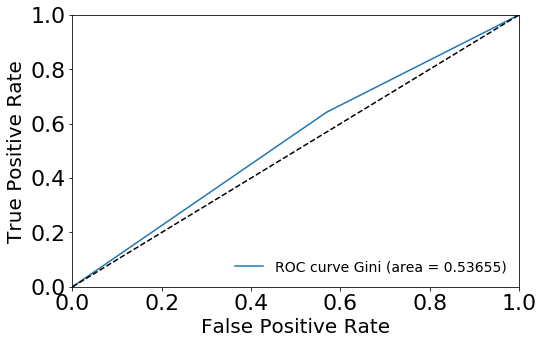

In [14]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

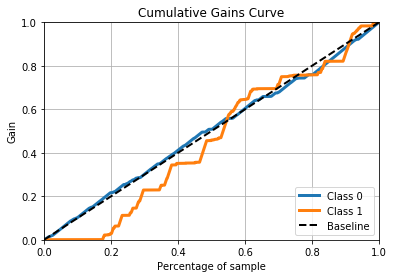

In [15]:
#Plotting the lift chart
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_train, y_train)
y_predB = clf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_predB)
plt.show()

In [16]:
df.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,17,1,23.18,27.2720,1.0,721.25,0.004793,1
1,1,17,1,23.15,27.2675,1.0,714.00,0.004783,1
2,1,17,1,23.15,27.2450,1.0,713.50,0.004779,1
3,1,17,1,23.15,27.2000,1.0,708.25,0.004772,1
4,1,17,1,23.10,27.2000,1.0,704.50,0.004757,1
